# Assignment 2: Milestone I Natural Language Processing
## Task 2 & 3
#### Student Name: Shivam Manish Shinde
#### Student ID: s3994666

Date: 20-05-2024

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used in the Task are as follows:
* pandas
* re
* numpy
* Counter
* os
* TfidfVectorizer
* train_test_split
* KFold
* LogisticRegression
* LabelEncoder
* confusion_matrix
* accuracy_score
* seaborn 
* matplotlib

## Introduction

In this evaluation, we wanted to use natural language processing (NLP) approaches to classify job advertisements. The goal was to investigate various feature representations of text data and assess their effects on classification model performance. 

In Task 2, we created various feature representations for job advertisement descriptions. These representations consisted of count vectors, unweighted word embeddings, and TF-IDF weighted word embeddings. Each method captures distinct characteristics of the textual data, offering various viewpoints on the categorisation issue. The feature representations generated during this activity were preserved and later utilised to develop and assess classification models.

In Task 3, we focused on categorising job advertising using the feature representations created in Task 2. This challenge included two sets of experiments. First, we evaluated the performance of models constructed with count vectors, unweighted embeddings, and weighted embeddings. Second, we looked into whether including more information, such as job titles, would increase classification accuracy. We ensured a robust evaluation and comparison of model performance by using 5-fold cross validation.

Overall, this evaluation offered useful information about the efficacy of various NLP approaches and the significance of feature engineering in text classification tasks.



## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import re
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Passing the text file paths reuired for this task 
Data_Path = 'D:/AP_Assignment 2/rename_me/data'

preprocessed_job_path = os.path.join(Data_Path, 'preprocessed_job_ads.txt')
vocab_path = os.path.join(Data_Path, 'vocab.txt')

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

In [3]:
# Loading the vocabulary text file
vocab = {}
with open(vocab_path, 'r') as f:
    for line in f:
        word, idx = line.strip().split(':')
        vocab[word] = int(idx)

# Loading preprocessed job ads with their respective webindex
Ads_Jobs = []
webindexes = []
with open(preprocessed_job_path, 'r') as f:
    for line in f:
        if ':' in line:
            parts = line.strip().split(':')
            webindex = parts[0]
            job_ad = parts[1].split()
            webindexes.append(webindex)
            Ads_Jobs.append(job_ad)

In [4]:
# Defining a function to generate count vectors
def generate_count_vector(Ads_Jobs, vocab):
    count_vectors = []
    for ad in Ads_Jobs:
        ad_counter = Counter(ad)
        ad_vector = {vocab[word]: count for word, count in ad_counter.items() if word in vocab}
        count_vectors.append(ad_vector)
    return count_vectors

# Generating the count vectors
count_vectors = generate_count_vector(Ads_Jobs, vocab)
print(count_vectors)

[{33: 3, 3367: 1, 4392: 2, 1484: 2, 2751: 2, 2829: 1, 3991: 1, 3431: 1, 2999: 1, 3196: 1, 1144: 2, 1058: 2, 3764: 1, 2653: 2, 1183: 1, 874: 1, 1220: 1, 3463: 1, 2672: 1, 1542: 1, 2116: 2, 36: 3, 3088: 1, 3392: 1, 4714: 1, 707: 1, 3876: 1, 93: 1, 102: 1, 1465: 1, 3435: 1, 2291: 1, 3619: 1, 666: 1, 3541: 1, 1708: 1, 1169: 1, 910: 1, 3354: 1, 1968: 1, 3788: 1, 1003: 1}, {2163: 2, 1980: 2, 2751: 1, 3887: 1, 1974: 7, 33: 2, 3391: 1, 3307: 1, 5081: 1, 1582: 1, 3975: 1, 2145: 1, 35: 3, 3145: 2, 34: 2, 4251: 1, 4032: 1, 1211: 1, 1645: 1, 3935: 1, 3676: 1, 2514: 1, 322: 1, 3590: 1, 2564: 1, 5016: 1, 1632: 1, 3076: 2, 1058: 1, 3354: 1, 4061: 1, 4064: 1, 707: 1, 4228: 1, 3876: 1, 4795: 1, 2401: 1, 3623: 1, 1842: 1, 4478: 1}, {1713: 1, 295: 1, 1660: 1, 3745: 1, 1526: 1, 679: 4, 1285: 1, 2220: 8, 1197: 2, 4132: 2, 3373: 1, 4223: 1, 3743: 1, 1291: 1, 343: 2, 3917: 5, 4031: 2, 10: 2, 3992: 1, 1616: 2, 4464: 1, 1252: 1, 2899: 1, 2365: 1, 4009: 2, 2153: 1, 2924: 1, 2680: 1, 2058: 1, 1399: 1, 3153: 1, 4

We are using the Glove Model which is Global Vectors for Word Representation to generate the embeddings. .The glove.6B.300d.txt contains 6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors.

Download Link Source https://nlp.stanford.edu/projects/glove/

In [5]:
# Defining the path to the GloVe file
glove_path = 'D:/AP_Assignment 2/glove.6B.300d.txt'

In [6]:
# Loading the pre-trained word embedding model (GloVe)
def load_glove_model(glove_file):
    model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            model[word] = embedding
    return model

glove_model = load_glove_model(glove_path)  
print(f"Loaded {len(glove_model)} word vectors.") # Calculating the word vectors in the glove.6B.300d.txt

Loaded 400000 word vectors.


In [7]:
# Combining all the job advetisements into a single list of strings for TF-IDF computation
Ads_Jobs_combined = [' '.join(ad) for ad in Ads_Jobs]

In [8]:
# Computing the TF-IDF scores
vectorizer = TfidfVectorizer(vocabulary=vocab.keys())
tfidf_matrix = vectorizer.fit_transform(Ads_Jobs_combined)
tfidf_feature_names = vectorizer.get_feature_names_out()

In [9]:
# Creating a dictionary to map feature names to indices
tfidf_vocab = {word: idx for idx, word in enumerate(tfidf_feature_names)}

In [10]:
# Geting the TF-IDF weights for each job advertisement
tfidf_weights = tfidf_matrix.toarray()

In [11]:
# Function to generate embedding vectors
def generate_embedding_vector(Ads_Jobs, embedding_model, vocab, tfidf_weights=None):
    embedding_vectors = []
    for i, ad in enumerate(Ads_Jobs):
        if tfidf_weights is not None:
            # Using the TF-IDF weights
            ad_vector = np.sum([tfidf_weights[i][vocab[word]] * embedding_model[word]
                                for word in ad if word in embedding_model and word in vocab], axis=0)
        else:
            # Using the average embeddings
            ad_vector = np.mean([embedding_model[word] for word in ad if word in embedding_model], axis=0)
        embedding_vectors.append(ad_vector)
    return np.array(embedding_vectors)

### Saving outputs
Saving the count vector representation as per spectification.
- count_vectors.txt

- unweighted_vectors.npy

- weighted_vectors.npy

In [12]:
# Saving the generated count_vector to Data_Path which is already defined.
count_vector_path =os.path.join(Data_Path,'count_vectors.txt')

# Saving count vectors to file with webindex of each specified Job
with open(count_vector_path, 'w') as f:
    for webindex, vector in zip(webindexes, count_vectors):
        vector_str = ','.join([f'{idx}:{count}' for idx, count in sorted(vector.items())])
        f.write(f'#{webindex},{vector_str}\n')

In [13]:
# Printing the count_vector.txt file conetents to verify the format
def print_file_contents(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            print(line.strip())
            
print_file_contents(count_vector_path)

#68997528,33:3,36:3,93:1,102:1,666:1,707:1,874:1,910:1,1003:1,1058:2,1144:2,1169:1,1183:1,1220:1,1465:1,1484:2,1542:1,1708:1,1968:1,2116:2,2291:1,2653:2,2672:1,2751:2,2829:1,2999:1,3088:1,3196:1,3354:1,3367:1,3392:1,3431:1,3435:1,3463:1,3541:1,3619:1,3764:1,3788:1,3876:1,3991:1,4392:2,4714:1
#68063513,33:2,34:2,35:3,322:1,707:1,1058:1,1211:1,1582:1,1632:1,1645:1,1842:1,1974:7,1980:2,2145:1,2163:2,2401:1,2514:1,2564:1,2751:1,3076:2,3145:2,3307:1,3354:1,3391:1,3590:1,3623:1,3676:1,3876:1,3887:1,3935:1,3975:1,4032:1,4061:1,4064:1,4228:1,4251:1,4478:1,4795:1,5016:1,5081:1
#68700336,10:2,295:1,343:2,679:4,1197:2,1252:1,1285:1,1291:1,1316:1,1399:1,1526:1,1616:2,1660:1,1713:1,1876:1,2058:1,2153:1,2220:8,2365:1,2641:1,2675:1,2680:1,2809:1,2899:1,2924:1,3153:1,3156:1,3205:1,3373:1,3385:1,3412:1,3743:1,3745:1,3787:1,3917:5,3992:1,4008:1,4009:2,4031:2,4132:2,4223:1,4295:1,4453:1,4464:1,4598:1,4602:1,4785:1
#67996688,62:1,207:1,274:1,586:3,647:1,659:1,814:1,843:1,866:1,1262:1,1474:1,1736:1,1840:1,

In [14]:
# Generating unweighted embedding vectors
unweighted_vectors = generate_embedding_vector(Ads_Jobs, glove_model, tfidf_vocab)

#Saving the embedding vector into a file
np.save('D:/AP_Assignment 2/unweighted_vectors.npy', unweighted_vectors)
print(unweighted_vectors)

[[-0.14830371  0.05448134  0.01986259 ... -0.10657389 -0.12206848
  -0.08131303]
 [-0.11872835 -0.06435357  0.15965499 ... -0.01257399 -0.03983024
  -0.059913  ]
 [-0.14443987  0.09739714 -0.07171275 ... -0.18659849 -0.03373375
   0.04705603]
 ...
 [-0.10104773  0.09699812  0.09206133 ... -0.09506837 -0.08568555
  -0.05496326]
 [-0.17788631 -0.00522296  0.00435697 ... -0.0580406   0.00663648
  -0.07822399]
 [-0.08211681  0.10108976 -0.00677542 ... -0.11890902 -0.0913539
   0.02528656]]


In [15]:
# Generating TF-IDF weighted embedding vectors
weighted_vectors = generate_embedding_vector(Ads_Jobs, glove_model, tfidf_vocab, tfidf_weights=tfidf_weights)

# Saving the embedding vectors to a file
np.save('D:/AP_Assignment 2/weighted_vectors.npy', weighted_vectors)
print(weighted_vectors)

[[-1.33615058  0.24469513  0.44007627 ... -0.57433408 -1.07718039
  -0.41822557]
 [-3.68678253 -1.94009024  2.0742655  ...  0.20450453  0.08356802
   0.19832909]
 [-2.18122404  2.52975568 -1.70766092 ... -2.82161085 -0.40290959
   2.5541637 ]
 ...
 [-3.5954767   1.45900899  3.12356373 ... -1.47902287 -0.81935992
   0.99395751]
 [-2.29692245 -0.54078894  0.49750677 ...  0.01720983  0.57234043
  -0.71351069]
 [-0.72162417  0.44317923 -0.38048214 ... -2.45626838 -1.3756685
   0.86816389]]


In [16]:
# Verifying the shape of the generated embeddings
print("Shape of weighted vectors:", weighted_vectors.shape)
print("Shape of unweighted vectors:", unweighted_vectors.shape)

Shape of weighted vectors: (776, 300)
Shape of unweighted vectors: (776, 300)


## Task 3. Job Advertisement Classification

In this task we are implementing **Logistic Regression** machine learning model for comparison of the language models through feature representations. We have three feature representtions generated in task 2 as follows:
1. Vector Counts
2. TF-IDF Weighted Embeddings
3. Unweighted Embeddings

First we will load all the files required for this task. Then we will implement the logistic regression model to compare those models. Apart from it, when evaluating the performance of the models, we will conduct a 5-fold cross validation
to obtain robust comparisons. In all we will calculate 5 accuracies:

**For Q1**:
* Count_Vector Accuracy
* TF-IDF Weighted Accuracy
* Unweighted Accuracy

**For Q2**:
* Title Accuracy
* Combined Title & Description Accuracy


In [17]:
# Loading  count vectors
count_vectors = []
webindexes = []
with open(count_vector_path,'r') as f:
    for line in f:
        parts = line.strip().split(',')
        webindex = parts[0][1:]
        vector = {int(kv.split(':')[0]): int(kv.split(':')[1]) for kv in parts[1:]}
        webindexes.append(webindex)
        count_vectors.append(vector)

# Converting the count vectors to a dense matrix
vocab_size = max(max(vector.keys()) for vector in count_vectors) + 1
count_matrix = np.zeros((len(count_vectors), vocab_size))
for i, vector in enumerate(count_vectors):
    for idx, freq in vector.items():
        count_matrix[i, idx] = freq



In [18]:
# Loading the unweighted and weighted vectors and saving it 
unweighted_vectors = np.load('D:/AP_Assignment 2/unweighted_vectors.npy')
weighted_vectors = np.load('D:/AP_Assignment 2/weighted_vectors.npy')

In [19]:
# Loading the job titles and categories
titles = []
categories = []
with open('D:/AP_Assignment 2/rename_me/data/title_category.txt', 'r') as f:
    for line in f:
        parts = line.strip().split(':')
        title = ':'.join(parts[:-1])  # Joining all the parts except the last one to handle extra colons in the title
        category = parts[-1]
        titles.append(title)
        categories.append(category)

# Encoding the categories 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(categories)


In [20]:
# Printing the title categories for verification 
print(titles)

['Finance / Accounts Asst Bromley to ****k', 'Fund Accountant  Hedge Fund', 'Deputy Home Manager', 'Brokers Wanted Imediate Start', 'RGN Nurses (Hospitals)  Penarth', 'Production Coordinator', 'Scrub Nurse', 'Sales & Purchase Ledger Clerk  Maternity Cover', 'Recruitment Sales Executive', 'Business Development Executive  Field Sales  Dartford', 'Investments & Treasury Controller', 'European Payroll', 'Engineering Assessor / Instructor  South Yorkshire', 'International Account Manager', 'Senior Production Technologist (Malaysia)', 'Insurance Sales Executive  Horsham', 'Vehicle Purchaser / Car Sales', 'Marine Engines Specialist â€“ Product Support', 'Sales Manager/Medical Sales Executive', 'Optical Assistant  Oxfordshire', 'PERM Unit Mgr RGN Kid minster Flexi ****K due', "PERM RGN's in Bangor CoDown  F/T Flexi  ****ph ExOpp  Bangor", 'Ecommerce Country Manager (Netherlands)', 'Business Development Manager  Leading Financial Lending PLC', 'Dynamics AX Finance Consultant, London, c****k', '

In [21]:
# Performing Logistic Regresiion with 5-fold cross validation
def evaluate_model(X, y, title, seed=15, max_iter=1000):
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    accuracies = []
    all_conf_mats = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = LogisticRegression(random_state=seed, max_iter=max_iter)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

        conf_mat = confusion_matrix(y_test, y_pred)
        all_conf_mats.append(conf_mat)

    # Aggregating the confusion matrices
    avg_conf_mat = np.mean(all_conf_mats, axis=0)

    # Ploting confusion matrix
    plt.figure(figsize=(8, 7))
    ax = sns.heatmap(avg_conf_mat, annot=True, fmt='.2f', cmap="BuPu",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()
   
    return np.mean(accuracies)

Here implementing 5-fold cross-validation ensures a robust and reliable evaluation of the model, helping to avoid overfitting and providing a comprehensive performance insight. Also, we will plot a heatmap of the confusion matrix which allows for easy interpretation and visualization of the model's performance, highlighting areas for potential improvement and facilitating better communication of the results.Here we wil also implement the heatmap for actual and predicted values. The heatmap will be imputed for all the accuracy values we will get.

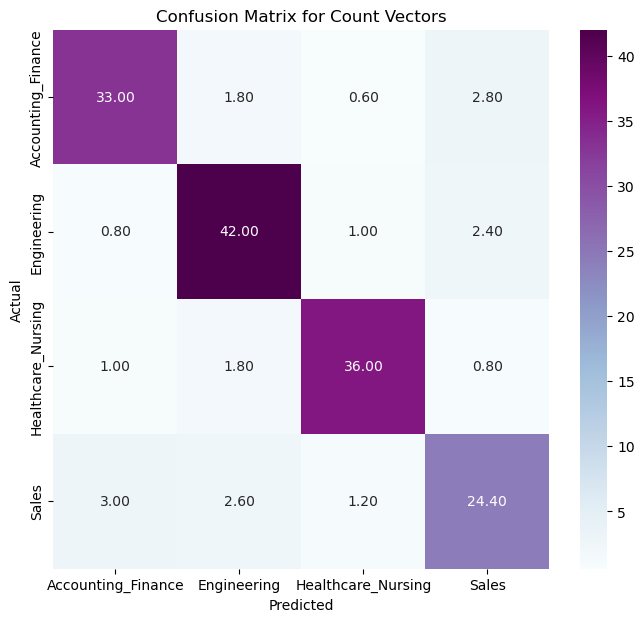

Count Vector Accuracy: 0.872


In [22]:
# Evaluating the Count Vectors
count_accuracy = evaluate_model(count_matrix, y, title="Count Vectors")
print(f"Count Vector Accuracy: {count_accuracy:.3f}")


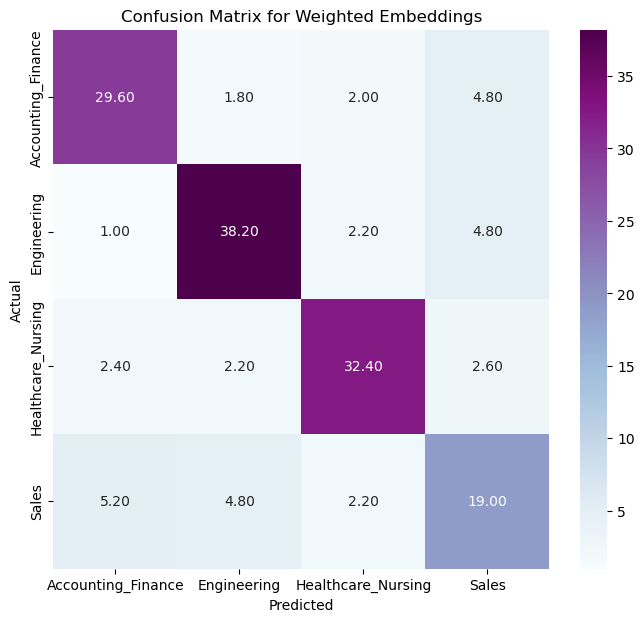

Weighted Embedding Accuracy: 0.768


In [23]:
# Evaluation of Weighted Embeddings
weighted_accuracy = evaluate_model(weighted_vectors, y, title="Weighted Embeddings")
print(f"Weighted Embedding Accuracy: {weighted_accuracy:.3f}")


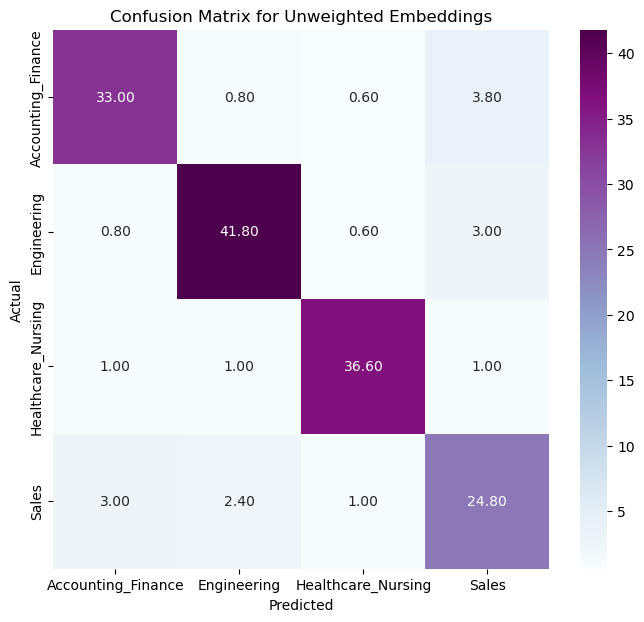

Unweighted Embedding Accuracy: 0.878


In [24]:
# Evaluation of Unweighted Embeddings
unweighted_accuracy = evaluate_model(unweighted_vectors, y, title="Unweighted Embeddings")
print(f"Unweighted Embedding Accuracy: {unweighted_accuracy:.3f}")


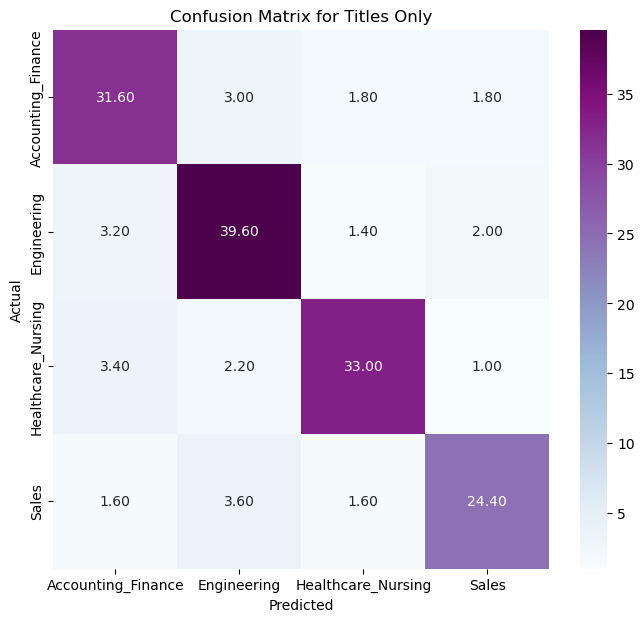

Title Accuracy: 0.829


In [25]:
# Creating TF-IDF features for titles only
title_vectorizer = TfidfVectorizer()
title_tfidf = title_vectorizer.fit_transform(titles).toarray()

# Evaluating the title-only features
title_accuracy = evaluate_model(title_tfidf, y, title="Titles Only")
print(f"Title Accuracy: {title_accuracy:.3f}")

In [26]:
# Function for creating combined descriptions with titles
def concatenate_title_description(titles, descriptions):
    combined = []
    for title, desc in zip(titles, descriptions):
        combined.append(f"{title} {desc}")
    return combined

Ads_Jobs_combined = [' '.join(ad) for ad in Ads_Jobs]
combined_text = concatenate_title_description(titles, Ads_Jobs_combined)
vectorizer = TfidfVectorizer()
combined_tfidf = vectorizer.fit_transform(combined_text).toarray()

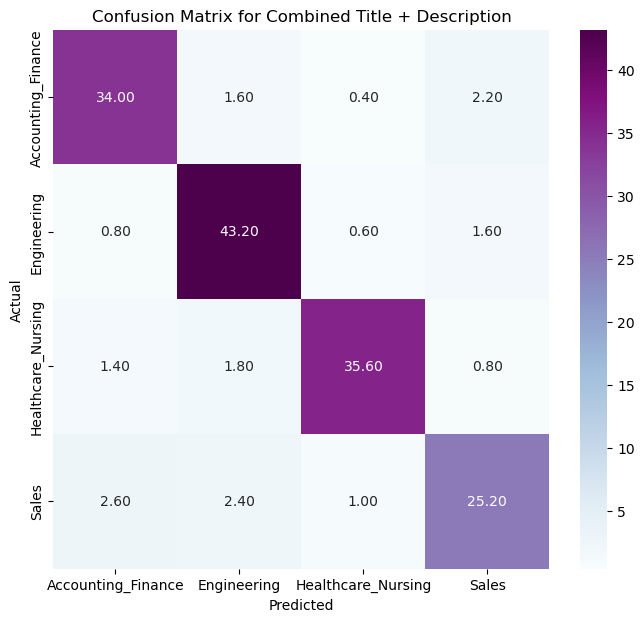

Combined Title + Description Accuracy: 0.889


In [27]:
# Evaluation of combined features
combined_accuracy = evaluate_model(combined_tfidf, y, title="Combined Title + Description")
print(f"Combined Title + Description Accuracy: {combined_accuracy:.3f}")


## Final Conclusion and Results

Here we performed two sets of experiments which were carried out in order to address the following queries:

1. **Language Model Comparisons**: Considering the selected machine learning model, which language model from the past performs the best ?


2. **Is Higher Accuracy Provided by More Information**: Does adding more data, like job titles, increase the accuracy of the model ?

Our machine learning model implemented was **Logistic Regression**, and in order to guarantee reliable comparisons, we ran **5-fold cross-validation**.

#### Results

The accuracies of the models using different feature representations are as follows:

- Count Vector Accuracy: 0.872
- Unweighted Embedding Accuracy: 0.878
- Weighted Embedding Accuracy: 0.768
- Title Only Accuracy: 0.829
- Combined Title + Description Accuracy: 0.889

#### Q1: Comparisons of Language Models

We compared the accuracy of models constructed using count vectors, unweighted embeddings, and weighted embeddings to find which language model performs the best.

* **Count Vectors**: The model with the most accuracy was the one utilizing count vectors, with a score of 0.872. 

* **Unweighted Embeddings**: The model with the highest accuracy, 0.878. 

* **Weighted Embeddings**: The model with the lowest accuracy, 0.768, was the one using weighted embeddings.


**Result**: The weighted embeddings underperformed compared to the other two, while the unweighted embeddings outperformed the count vectors by a little margin. As a result, the **unweighted embeddings language model** performs the best in this dataset when it comes to classifying job advertising.


#### Q2: Does Accuracy Increase with More Information?

We constructed models utilizing only job names, only job descriptions, and both titles and descriptions in order to assess the effect of additional information.

- **Titles Only**: An accuracy of 0.829 was attained by the model that solely considered job titles.

- **Descriptions Only**: The model with accuracies of 0.872 (count vectors), 0.878 (unweighted embeddings), and 0.768 (weighted embeddings) was trained using job descriptions, as demonstrated in the earlier tests.

- **Combined Title + Description**: The model with the highest accuracy (0.889) was the one that combined the job names and descriptions.

**Result**: The accuracy of the model was considerably increased by adding further data, such as job titles. It is evident that additional information does, in fact, lead to higher accuracy because the **combined title and description model** performed better than models that merely included descriptions or titles.


#### Conclusion:
Our experiment results concludes that the **combined title and description feature representation** be used for job advertisement classification. This model had the highest accuracy and proved how important it is to use a variety of information sources.

## Summary

In Task 2, we worked on creating feature representations for job advertisement descriptions. We generated count vectors, unweighted word embeddings, and TF-IDF weighted word embeddings. These representations capture various elements of the text data and are preserved for future use in classification models.

In Task 3, we used logistic regression to determine the classification performance of these feature representations. We compared models generated with count vectors, unweighted embeddings, and weighted embeddings, and discovered that unweighted embeddings performed the best. Furthermore, we investigated the effect of incorporating job titles in the feature set. The combined model, which included both job titles and descriptions, had the highest accuracy, highlighting the importance of including several sources of information.

**Reflections on Assessment Tasks**

These challenges provided a thorough examination of natural language processing techniques and their use in text classification. By comparing multiple feature representations and including extra information, we learned how different data features affect model performance. The use of 5-fold cross-validation resulted in robust evaluation, emphasising the need of extensive testing in machine learning applications. Overall, our review emphasised the need of feature engineering and the possibility of improving models with new context.

## References

- Scikit-learn. (n.d.). *Scikit-learn: Machine learning in Python*. Retrieved from https://scikit-learn.org/stable/


- Waskom, M. L. (2021). *Seaborn: Statistical data visualization*. Journal of Open Source Software, 6(60), 3021. Retrieved from https://seaborn.pydata.org/


- RMIT University. (n.d.-a). *Representing documents: Bag of embeddings*. Retrieved from https://rmit.instructure.com/courses/134429/pages/representing-documents-bag-of-embeddings?module_item_id=5855648


- RMIT University. (n.d.-b). *Representing documents: Recurrent neural network*. Retrieved from https://rmit.instructure.com/courses/134429/pages/representing-documents-recurrent-neural-network?module_item_id=5855649


- Localhost. (n.d.). *Week 8 exercise 1 solution*. Retrieved from http://localhost:8888/notebooks/w08_ex1_solution.ipynb


- Stack Overflow. (2016). Evaluating logistic regression with cross-validation. Retrieved from https://stackoverflow.com/questions/39163354/evaluating-logistic-regression-with-cross-validation